In [1]:
#Importamos las Librerias
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Importar Librerias para Advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrimos el Archivo
fishData = pd.read_csv("Fish.csv", engine = 'python')
fishData.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# Revisar nulos
print(fishData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [4]:
# Revisar atipicos
print(fishData.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [5]:
xFishVariables = fishData.drop(['Species'], axis = 1)

In [6]:
xFishVariables.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#Escalaramos con MinMaxScaler() para obtener datos similares entre si
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Definimos las variables a escalar
num_vars = ['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']
#Estandarizamos las variables
xFishVariables[num_vars] = scaler.fit_transform(xFishVariables[num_vars])

xFishVariables

,Weight,Length1,Length2,Length3,Height,Width
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...,...
154,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771
155,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208
156,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347
157,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719


In [8]:
#Ya que no sabemos cuantos Clusters son ideales, probaremos cual seria la mejor opcion
wcss = []

#Usando Codo De Jambu, podemos definir la cantidad de Clusters correcta
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, max_iter = 300)
    kmeans.fit(xFishVariables) #Aplicamos K-Means a los datos
    wcss.append(kmeans.inertia_)

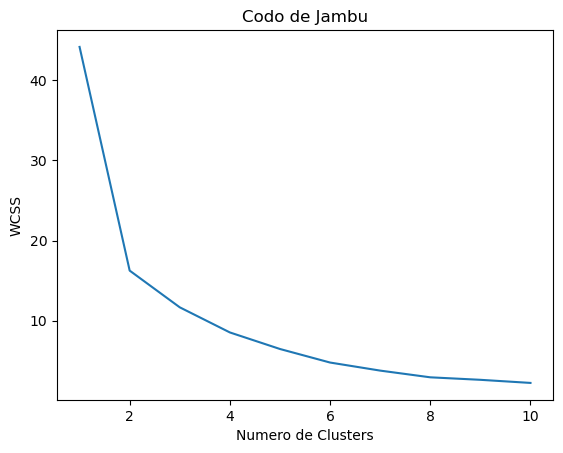

In [9]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de Clusters")
plt.ylabel('WCSS') #Indicador para saber que tan similares son los grupos formados dentro de los clusters
plt.show()

In [10]:
#Lo ideal es manejar 3 Cluster, segun lo que indica Codo De Jambu

clustering = KMeans(n_clusters= 3, max_iter = 300) #Crea el modelo para el Clustering
clustering.fit(xFishVariables) #Aplicamos el Clustering al modelo


KMeans(n_clusters=3)

In [11]:
#Guardamos los resultados del Clustering en el modelo inicial
fishData['KMeans_Clustering'] = clustering.labels_
fishData.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,KMeans_Clustering
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)#Grafico en 2D
pca_fish = pca.fit_transform(xFishVariables)
pca_fish_df = pd.DataFrame(data = pca_fish, columns =['Componente_1', 'Componente_2'])
pca_fishSpecies = pd.concat([pca_fish_df, fishData[['KMeans_Clustering']]], axis = 1)

#Ubicacion de los Componentes y Al Cluster al que pertenece
pca_fishSpecies

,Componente_1,Componente_2,KMeans_Clustering
0,-0.055256,-0.173094,1
1,0.018723,-0.204693,1
2,0.054445,-0.201210,1
3,0.103649,-0.173143,1
4,0.162745,-0.160343,0
...,...,...,...
154,-0.798000,0.083945,2
155,-0.794090,0.072220,2
156,-0.789939,0.087084,2
157,-0.694680,0.067659,2


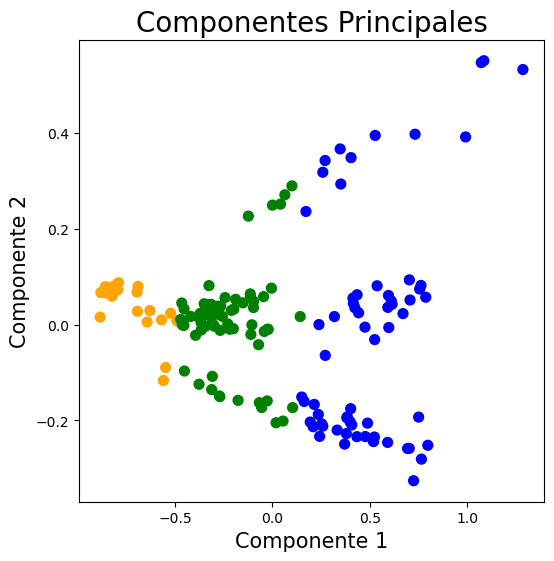

In [13]:
#Grafica correspondiente al Cluster al que pertenece
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

#Elegimos el color para los Clusters
color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_fishSpecies.Componente_1, y = pca_fishSpecies.Componente_2,
          c = color_theme[pca_fishSpecies.KMeans_Clustering], s = 50)

plt.show()